In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [45]:
GEP1 = pd.read_csv('../data/GEP/Consumption_15min.csv', index_col=0, header=0, names=['value'])
ERCOT = pd.read_csv('../data/ERCOT/ercot_data.csv', index_col=0, header=0, names=['value','T'])
GEFCOM = pd.read_csv('../data/GEFCom2014/gefcom2014.csv', index_col=0, header=0, names=['value'])

In [81]:
GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:,0]

dayofweek
0    12.330962
1    12.394557
2    12.787164
3    12.400101
4    11.992488
5     8.170304
6     8.265877
Name: value, dtype: float64

In [83]:
GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:]

,value
dayofweek,
0,12.330962
1,12.394557
2,12.787164
3,12.400101
4,11.992488
5,8.170304
6,8.265877


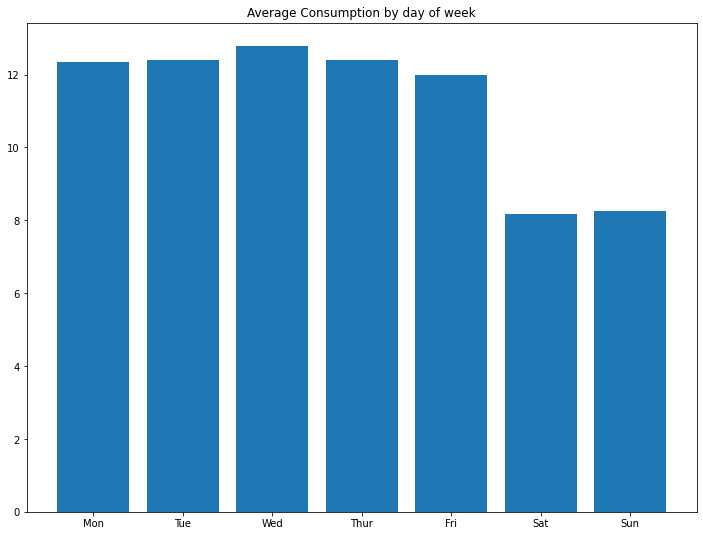

In [106]:
GEP1.index = pd.to_datetime(GEP1.index)
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
GEP1['new'] = GEP1.groupby(GEP1.index.dayofweek).value.transform('mean')
GEP1['dayofweek'] = GEP1.index.dayofweek
ax.bar(GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().index, GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:,0])
ax.set_xticks(GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().index)
ax.set_xticklabels(days)
plt.title('Average Consumption by day of week')
plt.show()

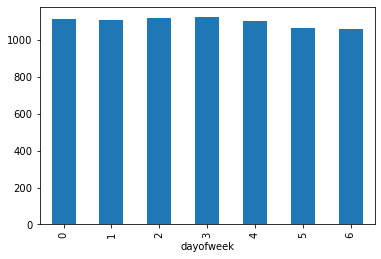

In [48]:
ERCOT.index = pd.to_datetime(ERCOT.index)
ERCOT['new'] = ERCOT.groupby(ERCOT.index.dayofweek).value.transform('mean')
ERCOT['dayofweek'] = ERCOT.index.dayofweek
ERCOT[['dayofweek', 'value']].groupby('dayofweek').mean().plot(kind='bar', legend=None)
plt.show()

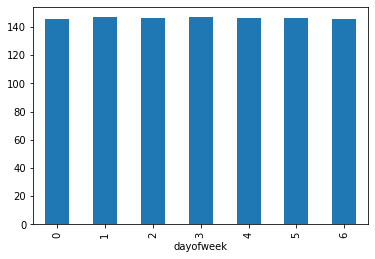

In [47]:
GEFCOM.index = pd.to_datetime(GEFCOM.index)
GEFCOM['new'] = GEFCOM.groupby(GEFCOM.index.dayofweek).value.transform('mean')
GEFCOM['dayofweek'] = GEFCOM.index.dayofweek
GEFCOM[['dayofweek', 'value']].groupby('dayofweek').mean().plot(kind='bar', legend=None)
plt.show()